#### Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

####   Importing the EXCEL sheet
#### The path of the excel sheet is set according to my desktop, kindly change the path as per your desktop to run it

Here I am converting the excel column to a list named "professions_list" for further manipulation



In [13]:
TaskData = pd.read_excel("TaskData.xlsx",header=None)
professions_list = TaskData[0].tolist()

#### This is the list of career options available 


In [14]:
career = [ "Doctor","Lawyer","Teacher","Engineer","Accountant","Nurse","Police","Architect","Dentist","Pharmacist"]

#### This is the function which creates a vector of a string. It increases the count of the letter which is in the string

In [15]:
def create_vector(s):
    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    vector = [0] * 26
    for char in s.lower():
        if char in alphabet:
            index = alphabet.index(char)
            vector[index] += 1
    return vector

#### This function calculates the cos theta of between two vectors by using the dot product formula
This helps to have a nice comparison between similarities of two vectors.
The one with highest cos theta value happens to be the closest answer


In [16]:
def cosine_similarity(a, b):
    dot_product = np.dot(a, b)
    magnitude_a = np.linalg.norm(a) # Calculating magnitude of vector a
    magnitude_b = np.linalg.norm(b) # Calculating magnitude of vector b
    if magnitude_a == 0 or magnitude_b == 0:
        return 0  
    return dot_product / (magnitude_a * magnitude_b)

#### Dictionary to store corrected career choices and their number of occurrence in TaskData

In [17]:
count = {option: 0 for option in career} # Initialising all values with 0

#### Here I am running the loop for each data in the TaskData imported

#### In each loop I am creating a list named "similarity_scores" in which  I will store the value of cos theta between the vector of corresponding data of TaskData and each career options provided 

#### After each loop I am checking the maximum cosine theta value and increasing the count of that career in my dictionary "count" which I have created above 

In [18]:
# Correcting the spelling mistakes
for i in professions_list:
    similarity_scores = []
    for option in career:
        vec_a = np.array(create_vector(option))
        vec_b = np.array(create_vector(i))
        similarity_scores.append(cosine_similarity(vec_a, vec_b))
    max_index = np.argmax(similarity_scores)
    count[career[max_index]] += 1

#### Printing the dictionary containing the career names with its corresponding count 

In [19]:
for key, value in count.items():
    print(key, ':', value)

Doctor : 191
Lawyer : 82
Teacher : 209
Engineer : 328
Accountant : 34
Nurse : 85
Police : 162
Architect : 70
Dentist : 192
Pharmacist : 53


#### Plotting the bar chart

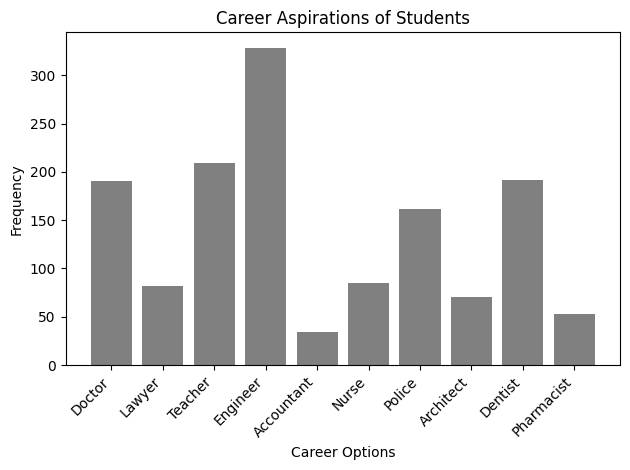

In [20]:
# Now i will plot bar chart
plt.bar(count.keys(), count.values(),color='grey')

plt.xlabel('Career Options')
plt.ylabel('Frequency')
plt.title('Career Aspirations of Students')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
